## Reliability calculations module

### Plotting reliability

Reliability formula: <br>

$\begin{equation} \mathrm{R} = e^{(\frac{-t}{\eta})^{\beta}} \end{equation}$

In [1]:
import numpy as np
from math import exp, log, ceil
import matplotlib.pyplot as plt
%matplotlib inline

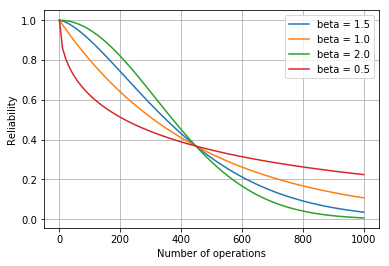

In [2]:
# characteristic life
eta = 448.3

# beta
beta = [1.5, 1.0, 2.0, 0.5]

# operations
t = np.linspace(0, 1000, 100)

def plotReliability(eta, beta, t):
    '''Plots reliability based on formula
    
    R = exp(-t/eta)**beta
    
    Inputs:
    -------------
    eta : float (mandatory)
        characteristic life
    beta : list (mandatory)
        exponent in the equation
    t : list or 1d array (mandatory) 
        number of cycles or operations
        
    Returns:
    -------------
    Plot of reliability as a function of operations/cycles
    '''
    # reliability
    R = np.empty([len(t), len(beta)])
    for i in range(len(beta)):
        for k in range(len(t)):
            R[k,i] = exp(-(t[k]/eta)**beta[i])
    
    # plotting
    for m in range(len(beta)):
        plt.plot(t, R[:,m], label = "beta = %s" %beta[m])
    plt.xlabel("Number of operations")
    plt.ylabel("Reliability")
    plt.grid(True)
    plt.legend();

plotReliability(eta, beta, t)

## Non-parametric binomial calculations

### Reliability and number of samples calculation

In [3]:
# functions definitions

def calculateReliabilityNPB (samples, CL, fails = 0):
    '''Calculate reliability based on confidence limits and number of samples.
    This version takes into account non-parametric binomial distribution
    
    Inputs:
    ------------
    samples: float
        number of tested samples
    CL: float
        confidence limits
    fails: float (optional)
        number of failed samples (by default none)
        
    Returns:
    ------------
    reliability: foat
        reliability number
    
    '''
    return (1-CL)**(1/samples)

def calculateSamplesNPB(rel, CL, fails=0):
    '''
    Calculate number of samples to prove required reliability @ given confidence limits.
    This version takes into account non-parametric binomial distribution
    
    Inputs:
    ------------
    rel: float
        target reliability
    CL: float
        confidence limits
    fails: float (optional)
        number of failed samples (by default none)
        
    Returns:
    ------------
    samples: foat
        number of samples for the test
    '''
    # math.ceil is used to round up to the next full int number
    return ceil(log(1-CL, rel))

In [4]:
# Reliability
R1 = calculateReliabilityNPB(3, 0.5)

# number of samples
n1 = calculateSamplesNPB(0.9, 0.5)

(R1, n1)

(0.7937005259840998, 7)